In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [38]:
from tensorflow.keras.datasets import cifar10

In [39]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [40]:
X_train=X_train/255


In [41]:
X_test=X_test/255

In [61]:
X_test.shape

(10000, 32, 32, 3)

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [44]:

y_cat_test.shape

(10000, 10)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [46]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.summary()

Model: &quot;sequential_2&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)     

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
earl=EarlyStopping(monitor='val_loss',patience=1)

In [49]:
model.fit(X_train,y_cat_train,epochs=15,callbacks=earl,validation_data=(X_test,y_cat_test))

Epoch 1/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4651 - accuracy: 0.4724 - val_loss: 1.2210 - val_accuracy: 0.5695
Epoch 2/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1392 - accuracy: 0.5978 - val_loss: 1.1289 - val_accuracy: 0.5956
Epoch 3/15
1563/1563 [==============================] - 45s 28ms/step - loss: 1.0034 - accuracy: 0.6454 - val_loss: 1.0268 - val_accuracy: 0.6439
Epoch 4/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8986 - accuracy: 0.6851 - val_loss: 0.9946 - val_accuracy: 0.6565
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8060 - accuracy: 0.7162 - val_loss: 0.9557 - val_accuracy: 0.6734
Epoch 6/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7268 - accuracy: 0.7454 - val_loss: 0.9618 - val_accuracy: 0.6793


&lt;tensorflow.python.keras.callbacks.History at 0x27e96e8a490&gt;

In [50]:
metrics=pd.DataFrame(model.history.history)

In [51]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.465107,0.47240,1.221022,0.5695
1,1.139215,0.59776,1.128859,0.5956
2,1.003408,0.64542,1.026764,0.6439
3,0.898597,0.68514,0.994606,0.6565
4,0.806043,0.71622,0.955692,0.6734
5,0.726810,0.74544,0.961803,0.6793


In [52]:
metrics.columns

Index([&#39;loss&#39;, &#39;accuracy&#39;, &#39;val_loss&#39;, &#39;val_accuracy&#39;], dtype=&#39;object&#39;)

&lt;AxesSubplot:&gt;

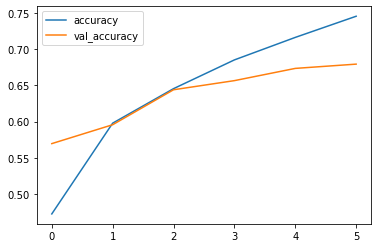

In [53]:
metrics[['accuracy','val_accuracy']].plot()

&lt;AxesSubplot:&gt;

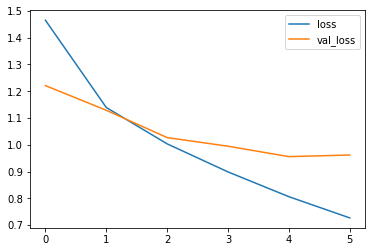

In [54]:
metrics[['loss','val_loss']].plot()

In [55]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9618 - accuracy: 0.6793


[0.9618031978607178, 0.6793000102043152]

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
predicts=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) &gt; 0.5).astype(&quot;int32&quot;)`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [58]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      1000
           1       0.85      0.72      0.78      1000
           2       0.58      0.58      0.58      1000
           3       0.53      0.41      0.47      1000
           4       0.61      0.68      0.64      1000
           5       0.64      0.54      0.58      1000
           6       0.66      0.85      0.74      1000
           7       0.77      0.72      0.75      1000
           8       0.66      0.87      0.75      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



&lt;AxesSubplot:&gt;

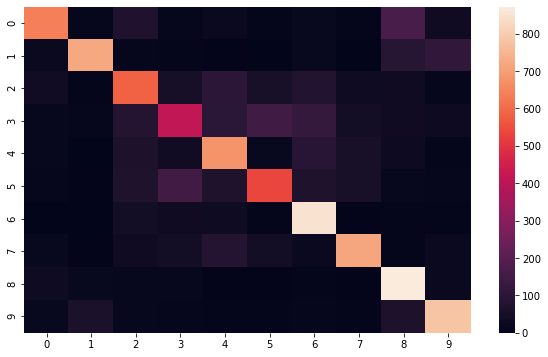

In [59]:
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predicts))

In [70]:
my_image=X_test[5]

In [71]:
my_image.shape

(32, 32, 3)

In [72]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([6], dtype=int64)